# Importing modules

In [82]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

In [17]:
%matplotlib inline

# Read data

In [2]:
data = pd.read_csv('pulsar_stars.csv')

In [4]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# Data exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [8]:
print (data.isnull().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


# Data visualization

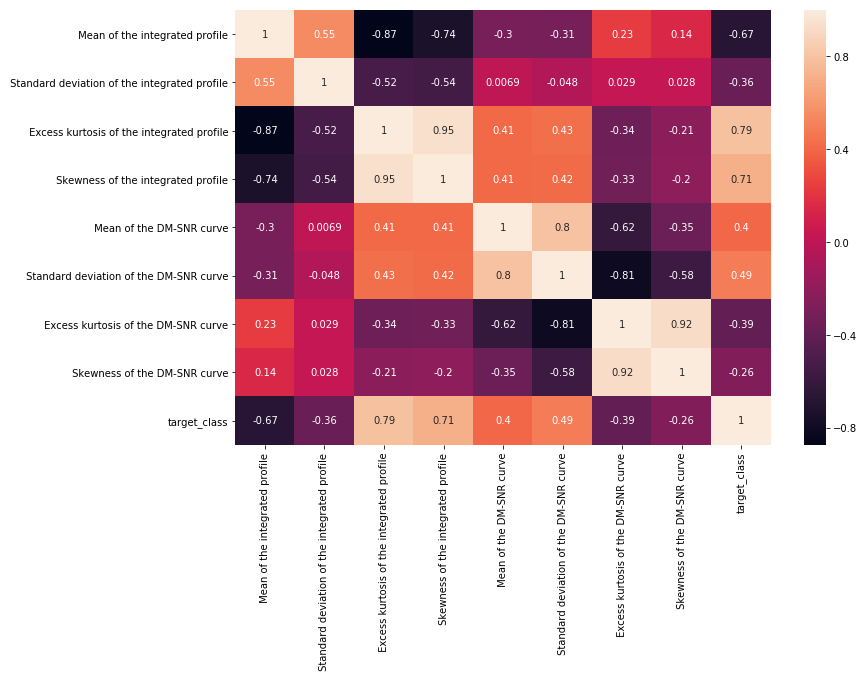

In [19]:
corr = data.corr()
plt.figure(figsize=(12,8))
sb.heatmap(corr, annot=True)

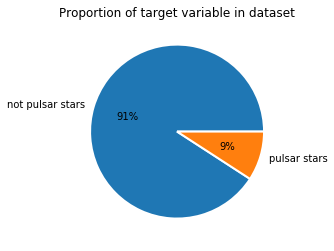

In [25]:
plt.pie(data['target_class'].value_counts().values,
        labels=['not pulsar stars', 'pulsar stars'],
        autopct="%1.0f%%",wedgeprops={'linewidth':2, 'edgecolor':'white'})

plt.title('Proportion of target variable in dataset')
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


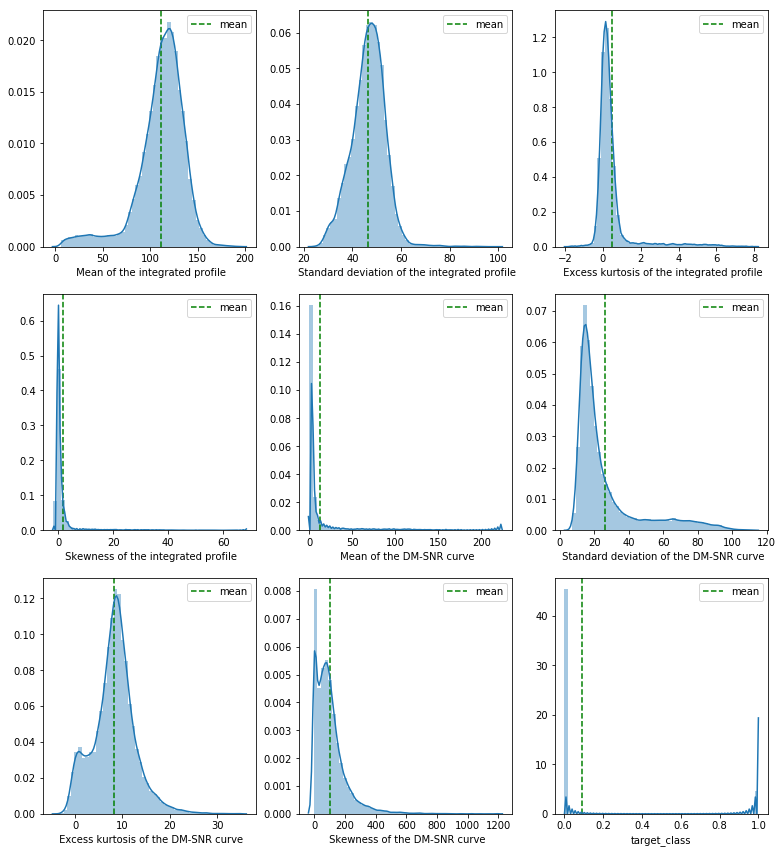

In [69]:
length = len(data.columns)
plt.figure(figsize=(13,20))
for i, c in enumerate(data.columns):
    plt.subplot(length/2, length/3, i+1)
    mean = data[c].mean()
    plt.axvline(mean, linestyle='--', color='g', label='mean')
    sb.distplot(data[c])
    
    txkw = dict(size=12, rotation=90)
    tx = "mean: {:.2f}".format(mean)
    plt.legend()

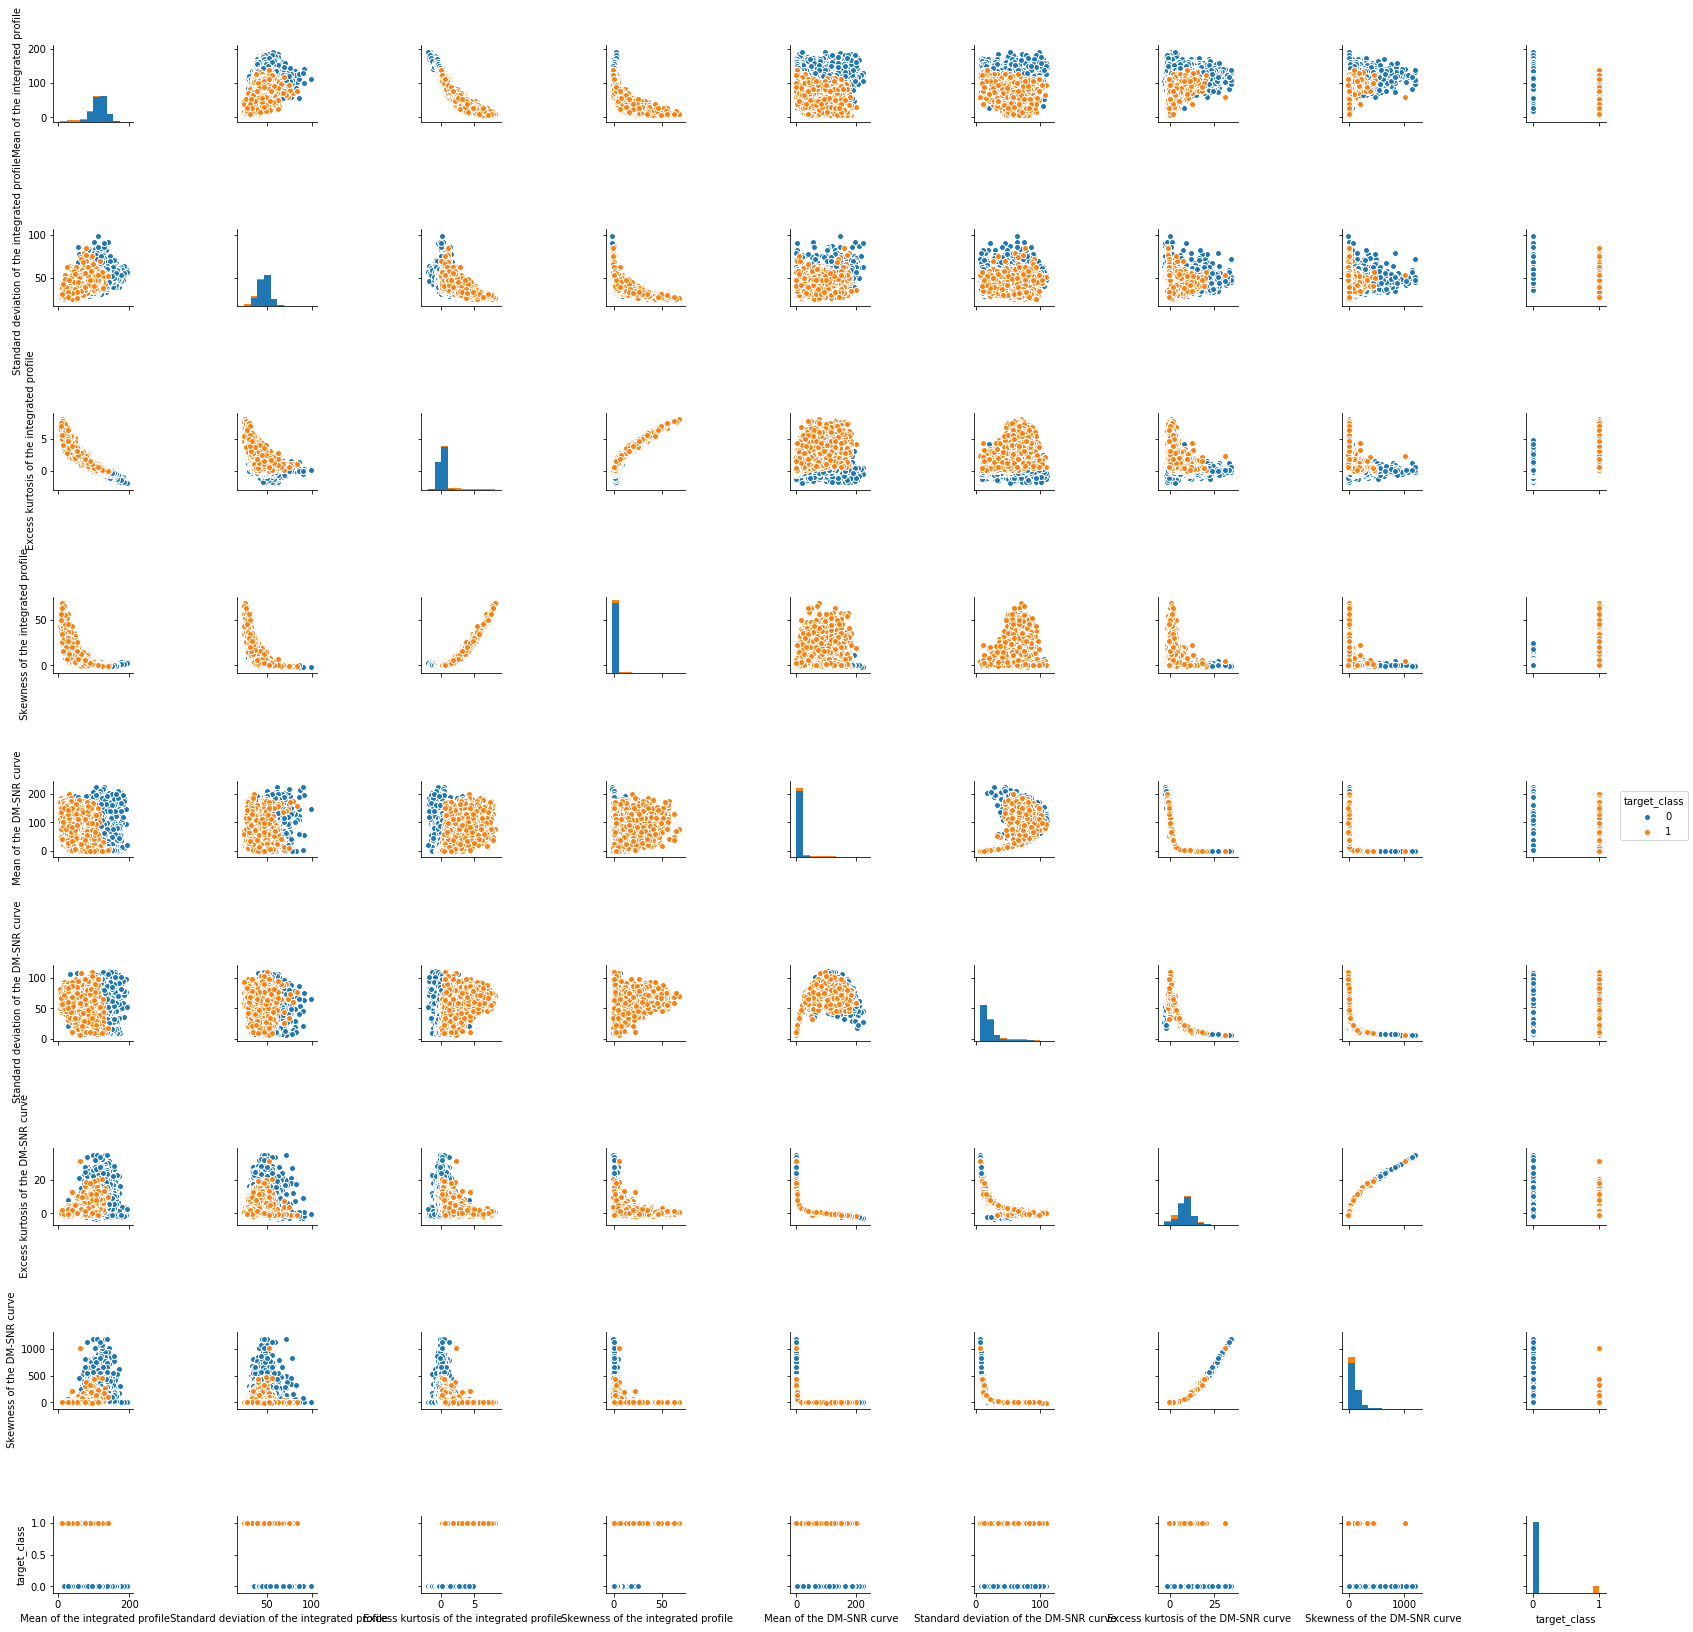

In [71]:
sb.pairplot(data, hue='target_class')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


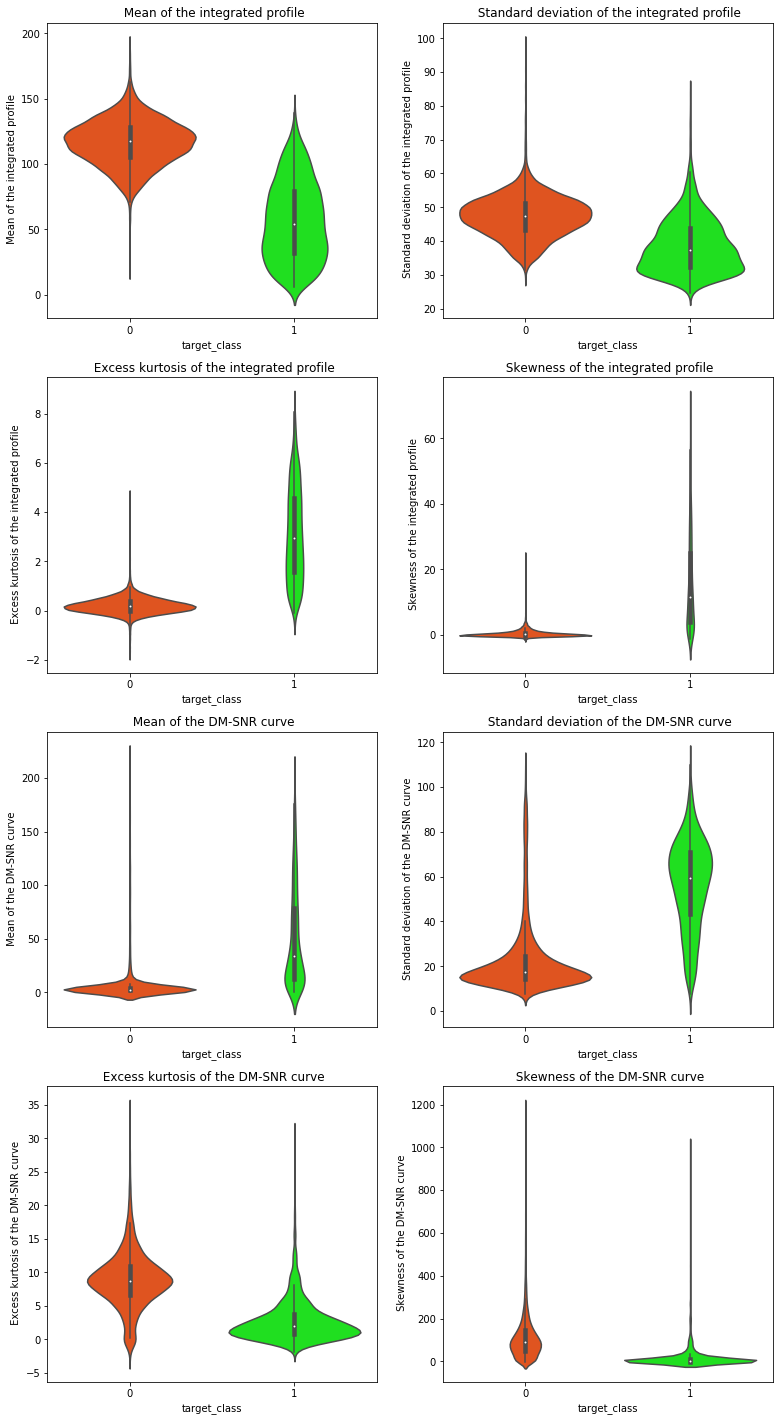

In [77]:
columns = [x for x in data.columns if x not in ["target_class"]]
length  = len(columns)

plt.figure(figsize=(13,25))

for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sb.violinplot(x=data["target_class"],y=data[i],
                   palette=["Orangered","lime"],alpha=.5)
    plt.title(i)

# Create model

In [94]:
def model(algorithm, dtrain_x, dtrain_y, dtest_x, dtest_y, of_type):
    
    print ("*****************************************************************************************")
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(dtrain_x, dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    
    print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
        
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sb.heatmap(confusion_matrix(dtest_y,predictions), annot=True, fmt = "d", linecolor="k", linewidths=3)
    plt.title("CONFUSION MATRIX", fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr, tpr, thresholds = roc_curve(dtest_y, predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_,dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sb.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sb.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
            
    elif of_type == "none" :
        return (algorithm)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['target_class'], axis=1), data['target_class'], test_size=0.3, random_state=123)

In [96]:
from sklearn.ensemble import RandomForestClassifier

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

accuracy_score : 0.9778398510242086

classification report :
              precision    recall  f1-score   support

          0       0.98      0.99      0.99      4860
          1       0.92      0.85      0.88       510

avg / total       0.98      0.98      0.98      5370



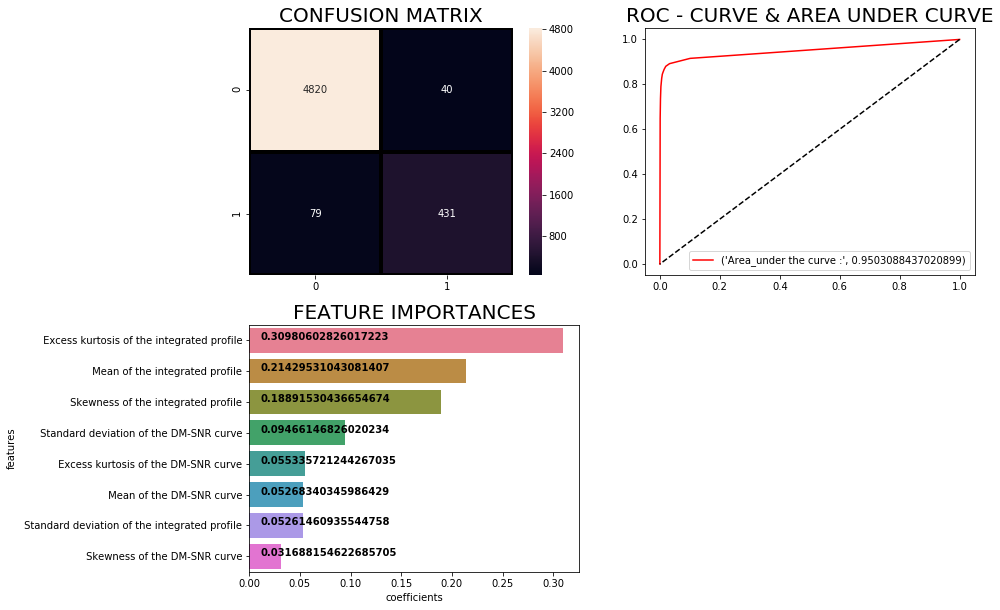

In [97]:
rf =RandomForestClassifier()
model(rf, X_train, y_train, X_test, y_test, "feat")